In [1]:
from model import *
from data import *

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'dataset/new train set/','train_img','train_label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_newtrain.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

C:\Users\StHow\OneDrive\2019-2020-2\Machine Learning\unet\model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
2000/2000 [==============================] - 1867s 933ms/step - loss: 0.2492 - accuracy: 0.9147

Epoch 00001: loss improved from inf to 0.24916, saving model to unet_newtrain.hdf5
Epoch 2/5
2000/2000 [==============================] - 1928s 964ms/step - loss: 0.1851 - accuracy: 0.9497

Epoch 00002: loss improved from 0.24916 to 0.18513, saving model to unet_newtrain.hdf5
Epoch 3/5
2000/2000 [==============================] - 1988s 994ms/step - loss: 0.1537 - accuracy: 0.9638

Epoch 00003: loss improved from 0.18513 to 0.15365, saving model to unet_newtrain.hdf5
Epoch 4/5
2000/2000 [==============================] - 1953s 976ms/step - loss: 0.1321 - accuracy: 0.9708

Epoch 00004: loss improved from 0.15365 to 0.13220, saving model to unet_newtrain.hdf5
Epoch 5/5
2000/2000 [==============================] - 1996s 998ms/step - loss: 0.1158 - accuracy: 0.9748

Epoch 00005: loss improved from 0.13220 t

More 5 epochs

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'dataset/new train set/','train_img','train_label',data_gen_args,save_to_dir = None)
model = unet()
model.load_weights("unet_newtrain.hdf5")
model_checkpoint = ModelCheckpoint('unet_newtrain.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
2000/2000 [==============================] - 1819s 910ms/step - loss: 0.1023 - accuracy: 0.9773

Epoch 00001: loss improved from inf to 0.10229, saving model to unet_newtrain.hdf5
Epoch 2/5
2000/2000 [==============================] - 1913s 956ms/step - loss: 0.0909 - accuracy: 0.9792

Epoch 00002: loss improved from 0.10229 to 0.09094, saving model to unet_newtrain.hdf5
Epoch 3/5
2000/2000 [==============================] - 1956s 978ms/step - loss: 0.0815 - accuracy: 0.9806

Epoch 00003: loss improved from 0.09094 to 0.08148, saving model to unet_newtrain.hdf5
Epoch 4/5
2000/2000 [==============================] - 1895s 947ms/step - loss: 0.0736 - accuracy: 0.9816

Epoch 00004: loss improved from 0.08148 to 0.07360, saving model to unet_newtrain.hdf5
Epoch 5/5
2000/2000 [==============================] - 1944s 972ms/step - loss: 0.0667 - accuracy: 0.9826

Epoch 00005: loss improved from 0.07360 t

### Train with npy file

In [5]:
# imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
imgs_train=np.load("dataset/new train set/img_arr.npy")
imgs_mask_train=np.load("dataset/new train set/mask_arr.npy")
model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

C:\Users\StHow\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 40 samples, validate on 10 samples
Epoch 1/10
40/40 [==============================] - 13s 321ms/step - loss: 0.5068 - accuracy: 0.7477 - val_loss: 0.4389 - val_accuracy: 0.7953

Epoch 00001: loss improved from inf to 0.50677, saving model to unet_membrane.hdf5
Epoch 2/10
40/40 [==============================] - 6s 147ms/step - loss: 0.4005 - accuracy: 0.7718 - val_loss: 0.3579 - val_accuracy: 0.7953

Epoch 00002: loss improved from 0.50677 to 0.40055, saving model to unet_membrane.hdf5
Epoch 3/10
40/40 [==============================] - 6s 147ms/step - loss: 0.3544 - accuracy: 0.8120 - val_loss: 0.3152 - val_accuracy: 0.8504

Epoch 00003: loss improved from 0.40055 to 0.35441, saving model to unet_membrane.hdf5
Epoch 4/10
40/40 [==============================] - 6s 148ms/step - loss: 0.3493 - accuracy: 0.8440 - val_loss: 0.3143 - val_accuracy: 0.8520

Epoch 00004: loss improved from 0.35441 to 0.34930, saving model to unet_membrane.hdf5
Epoch 5/10
40/40 [=====================

### test your model and save predicted results

In [7]:
testGene = testGenerator("dataset/new_test_set/test_img/",num_image=5)
model = unet()
model.load_weights("unet_newtrain.hdf5")
results = model.predict_generator(testGene,5,verbose=1)
saveResult("dataset/new_test_set/predict_label_1/",results)

5/5 [==============================] - 4s 816ms/step
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


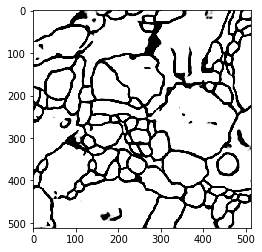

In [4]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

original_img=cv2.imread("dataset/new_test_set/predict_label/0_predict.png",0)
plt.imshow(original_img, cmap='gray')
plt.show()

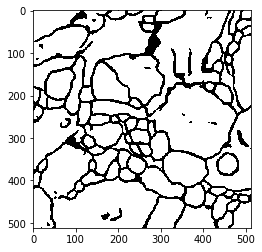

In [7]:
ret,thre1 = cv2.threshold(original_img,130,255,cv2.THRESH_BINARY)
plt.imshow(thre1, cmap='gray')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

acc_data=np.loadtxt("threshold_select.txt")
acc_data.shape

(255, 5)

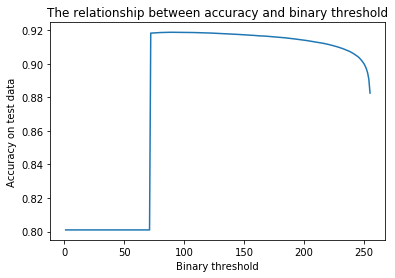

In [5]:
x=np.arange(1,256)
y=acc_data[:,4]
plt.plot(x,y)
plt.title("The relationship between accuracy and binary threshold") 
plt.xlabel("Binary threshold")
plt.ylabel("Accuracy on test data")
plt.savefig("unet_acc_thre.pdf")

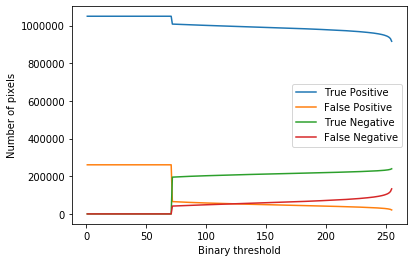

In [6]:
y_TP=acc_data[:,0]
y_FP=acc_data[:,1]
y_FN=acc_data[:,2]
y_TN=acc_data[:,3]
plt.plot(x,y_TP,label="True Positive")
plt.plot(x,y_FP,label="False Positive")
plt.plot(x,y_TN,label="True Negative")
plt.plot(x,y_FN,label="False Negative")
plt.xlabel("Binary threshold")
plt.ylabel("Number of pixels")
# plt.yscale('log')
plt.legend()
plt.savefig("unet_verbose_thre.pdf")

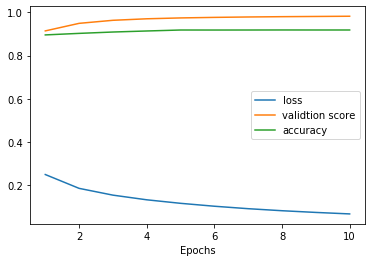

In [12]:
loss=[0.2492, 0.1851, 0.1537, 0.1321, 0.1158, 0.1023, 0.0909, 0.0815, 0.0736, 0.0667]
val_acc=[0.9147,0.9497,0.9638,0.9708,0.9748, 0.9773, 0.9792, 0.9806, 0.9816, 0.9826]
acc=[0.8961, 0.9032, 0.9095, 0.9143, 0.9188, 0.9187, 0.9188, 0.9190, 0.9189, 0.9189]
x=np.arange(1,11)
plt.plot(x,loss,label="loss")
plt.plot(x,val_acc,label="validtion score")
plt.plot(x,acc,label="accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.savefig("unethistory.pdf")